In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import emoji

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth',200)

In [3]:
df= pd.read_csv('../data/raw/news-article-categories.csv')

In [4]:
def clean_text(text):
    if pd.isna(text):
        return text
    text = text.lower()
    
    text = re.sub(r'http://\S+|https://\S+|www\.\S+', '', text, flags=re.MULTILINE) 
    text = emoji.replace_emoji(text, replace='')
    
    text = re.sub(r'[^\w\s]', ' ', text) 
    text = re.sub(r'\d', ' ', text) 
    text = re.sub(r'\n', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [5]:
df = df.drop_duplicates(subset='body', keep='first')

In [6]:

df.loc[:, 'title'] = df['title'].replace("", np.nan)
df.loc[:, 'body'] = df['body'].replace("", np.nan)

missing_values = df.isna().sum()

missing_values


category    0
title       0
body        1
dtype: int64

In [7]:
missing_value_rows = df[df.isna().any(axis=1)]

In [8]:
missing_value_rows

,category,title,body
536,ARTS & CULTURE,An Avant-garde Artist for Avant-garde Minds: A Major Retrospective of Francis Picabia at the Kunsthaus Zurich,NaN


In [9]:
df

,category,title,body
0,ARTS & CULTURE,"Modeling Agencies Enabled Sexual Predators For Years, Former Agent Says","In October 2017, Carolyn Kramer received a disturbing phone call. The former modeling agent listened intently as a model she used to represent told her that a famous French photographer, who still..."
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bold Patterns” and More (AUDIO),This week I talked with actor Jeff Hiller about the hit Off Broadway play Bright Colors And Bold Patterns that he’ll be joining on January 17th with a new opening night scheduled for February 4th....
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' After 'Racist' Comment,The New Yorker is taking on President Donald Trump after he asked why the U.S. would welcome immigrants from “shithole” places like Haiti and African countries during a bipartisan Oval Office meet...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Different Animation Styles,"Kellen Hickey, a 26-year-old who lives in Hudson, Wisconsin, has gift giving down to a fine art. He drew himself and his girlfriend Lindsay Brinkman, 24, in 10 different animation styles and gave ..."
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures A Goofy Modern Twist,"There’s something about combining the traditional, uptight look of the Renaissance period with modern-day behavior that excites Barcelona-based artist Gerard Mas. His resulting creations mix the a..."
...,...,...,...
6872,WOMEN,Casually Fearless: Why Millennials Are Natural Entrepreneurs,I still think about that Tuesday night dinner when my 22-year-old daughter told me she was leaving her full-time job at a Silicon Valley startup. Not only did she break it to me that she was quitt...
6873,WOMEN,Happy Birthday To Us,"I remember the morning of my high school graduation very clearly. As I put on my white linen dress and matching ballet slippers, my mother tried to explain to me as best as she could that she was ..."
6874,WOMEN,The Culture of Love,"My husband, Gene, doesn't wear pajamas. I asked him about it once, and he told me that he never had pajamas as a child. He also took care of his five younger siblings at a very young age and rarel..."
6875,WOMEN,"Carpe Diem, Oprah Style","\nBy AntonioGuillem, via ThinkStock\nBy Lisa O'Donoghue-Lindy, Managing Editor, SJWEH This article was originally featured on career2.0blog.net, an inspirational blog about women in professional ..."


In [10]:
df = df.dropna()


In [11]:
df.isna().sum()


category    0
title       0
body        0
dtype: int64

In [12]:
df = df.copy()

df['body_cleaned'] = df['body'].apply(clean_text)


In [13]:
df['title_cleaned'] = df['title'].apply(clean_text)


In [14]:
from sklearn.model_selection import train_test_split

X = df[['body_cleaned', 'title_cleaned']]
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sonuçları görüntüleyin
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data succesfuly splitted as  X_train, X_test, y_train, y_test.")


X_train boyutu: (5452, 2)
X_test boyutu: (1363, 2)
y_train boyutu: (5452,)
y_test boyutu: (1363,)
Veri başarıyla X_train, X_test, y_train, y_test olarak ayrıldı.


In [16]:
X_test.isnull().sum()

body_cleaned     0
title_cleaned    0
dtype: int64

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to C:\Users\bahar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bahar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:

def lemmatize_and_remove_stopwords(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)


In [19]:

# Metinleri işleyin
X_train_title = X_train['title_cleaned'].apply(lemmatize_and_remove_stopwords)
X_test_title = X_test['title_cleaned'].apply(lemmatize_and_remove_stopwords)


In [20]:
# Metinleri işleyin
X_train_body = X_train['body_cleaned'].apply(lemmatize_and_remove_stopwords)
X_test_body= X_test['body_cleaned'].apply(lemmatize_and_remove_stopwords)


In [23]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf_vectorizer = TfidfVectorizer()


In [70]:

tfidf_train_title = tfidf_vectorizer.fit_transform(X_train_title)

tfidf_test_title = tfidf_vectorizer.transform(X_test_title)


In [71]:

tfidf_train_title_spacy = tfidf_vectorizer.fit_transform(X_train_title_spacy)

tfidf_test_title_spacy = tfidf_vectorizer.transform(X_test_title_spacy)


In [79]:
tfidf_vectorizer2 = TfidfVectorizer(sublinear_tf=True, max_df=0.8, min_df=3, ngram_range=(1, 1))


In [114]:
tfidf_vectorizer3 = TfidfVectorizer(sublinear_tf=True, max_df=0.85, min_df=5, ngram_range=(1, 1))


In [115]:

tfidf_train_body_spacy = tfidf_vectorizer3.fit_transform(X_train_body_spacy)

tfidf_test_body_spacy = tfidf_vectorizer3.transform(X_test_body_spacy)


In [118]:

tfidf_train_body = tfidf_vectorizer3.fit_transform(X_train_body)

tfidf_test_body = tfidf_vectorizer3.transform(X_test_body)


In [89]:
print("Spacy Train Title TF-IDF Shape:", tfidf_train_title_spacy.shape)
print("Spacy Test Title TF-IDF Shape:", tfidf_test_title_spacy.shape)



Spacy Train Title TF-IDF Shape: (5452, 8370)
Spacy Test Title TF-IDF Shape: (1363, 8370)


In [90]:
print("Spacy Train Body TF-IDF Shape:", tfidf_train_body_spacy.shape)
print("Spacy Test Body TF-IDF Shape:", tfidf_test_body_spacy.shape)


Spacy Train Body TF-IDF Shape: (5452, 21741)
Spacy Test Body TF-IDF Shape: (1363, 21741)


In [54]:
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import lightgbm as lgb

def evaluate_models(X_train, X_test, y_train, y_test):
    models = [
        ("SGDClassifier", SGDClassifier(random_state=42)),
        ("Perceptron", Perceptron(random_state=42)),
        ("PassiveAggressiveClassifier", PassiveAggressiveClassifier(random_state=42)),
        ("LogisticRegression", LogisticRegression(random_state=42)),
        ("RidgeClassifier", RidgeClassifier(random_state=42)),
        ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
        ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("ExtraTreesClassifier", ExtraTreesClassifier(n_estimators=100, random_state=42)),
        ("KNeighborsClassifier", KNeighborsClassifier())
    ]
    
    results = {}
    
    for name, model in models:
        print(f"Model: {name}")
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        results[name] = {
            "accuracy": accuracy,
            "classification_report": report,
            "confusion_matrix": conf_matrix
        }
        
        print(f"Accuracy: {accuracy}")
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", conf_matrix)
        print("-" * 60)
    
    return results


In [74]:
results2= evaluate_models(tfidf_train_title_spacy, tfidf_test_title_spacy, y_train, y_test)

Model: SGDClassifier
Accuracy: 0.6302274394717535
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.64      0.65      0.65       208
      BUSINESS       0.53      0.51      0.52       109
        COMEDY       0.64      0.66      0.65        74
         CRIME       0.54      0.70      0.61        53
     EDUCATION       0.72      0.71      0.72       110
 ENTERTAINMENT       0.56      0.55      0.55        93
   ENVIRONMENT       0.61      0.60      0.61        99
         MEDIA       0.63      0.66      0.64        58
      POLITICS       0.64      0.66      0.65        95
      RELIGION       0.63      0.69      0.66        97
       SCIENCE       0.63      0.63      0.63        68
        SPORTS       0.77      0.73      0.75       103
          TECH       0.67      0.66      0.67        86
         WOMEN       0.55      0.46      0.50       110

      accuracy                           0.63      1363
     macro avg       0.63   

C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
results3= evaluate_models(tfidf_train_body, tfidf_test_body, y_train, y_test)

Model: SGDClassifier
Accuracy: 0.8275862068965517
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.90      0.88      0.89       208
      BUSINESS       0.78      0.63      0.70       109
        COMEDY       0.80      0.89      0.85        74
         CRIME       0.77      0.89      0.82        53
     EDUCATION       0.87      0.85      0.86       110
 ENTERTAINMENT       0.83      0.73      0.78        93
   ENVIRONMENT       0.86      0.87      0.86        99
         MEDIA       0.78      0.84      0.81        58
      POLITICS       0.83      0.87      0.85        95
      RELIGION       0.79      0.87      0.83        97
       SCIENCE       0.78      0.85      0.82        68
        SPORTS       0.86      0.94      0.90       103
          TECH       0.77      0.79      0.78        86
         WOMEN       0.81      0.68      0.74       110

      accuracy                           0.83      1363
     macro avg       0.82   

In [119]:
results3= evaluate_models(tfidf_train_body, tfidf_test_body, y_train, y_test)

Model: SGDClassifier
Accuracy: 0.8253851797505503
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.90      0.89      0.90       208
      BUSINESS       0.78      0.64      0.70       109
        COMEDY       0.78      0.88      0.83        74
         CRIME       0.78      0.89      0.83        53
     EDUCATION       0.88      0.86      0.87       110
 ENTERTAINMENT       0.84      0.68      0.75        93
   ENVIRONMENT       0.85      0.87      0.86        99
         MEDIA       0.75      0.84      0.80        58
      POLITICS       0.82      0.87      0.85        95
      RELIGION       0.81      0.87      0.84        97
       SCIENCE       0.78      0.84      0.81        68
        SPORTS       0.86      0.93      0.89       103
          TECH       0.78      0.80      0.79        86
         WOMEN       0.78      0.69      0.73       110

      accuracy                           0.83      1363
     macro avg       0.81   

In [88]:
results4= evaluate_models(tfidf_train_body_spacy, tfidf_test_body_spacy, y_train, y_test)

Model: SGDClassifier
Accuracy: 0.8319882611885546
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.93      0.89      0.91       208
      BUSINESS       0.79      0.65      0.71       109
        COMEDY       0.82      0.86      0.84        74
         CRIME       0.78      0.87      0.82        53
     EDUCATION       0.88      0.88      0.88       110
 ENTERTAINMENT       0.80      0.72      0.76        93
   ENVIRONMENT       0.85      0.87      0.86        99
         MEDIA       0.80      0.88      0.84        58
      POLITICS       0.82      0.83      0.83        95
      RELIGION       0.79      0.88      0.83        97
       SCIENCE       0.76      0.84      0.80        68
        SPORTS       0.87      0.92      0.90       103
          TECH       0.79      0.80      0.80        86
         WOMEN       0.79      0.74      0.76       110

      accuracy                           0.83      1363
     macro avg       0.82   

In [116]:
results4= evaluate_models(tfidf_train_body_spacy, tfidf_test_body_spacy, y_train, y_test)

Model: SGDClassifier
Accuracy: 0.8268525311812179
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.92      0.88      0.90       208
      BUSINESS       0.80      0.66      0.72       109
        COMEDY       0.81      0.86      0.84        74
         CRIME       0.79      0.87      0.83        53
     EDUCATION       0.87      0.88      0.88       110
 ENTERTAINMENT       0.79      0.70      0.74        93
   ENVIRONMENT       0.83      0.86      0.85        99
         MEDIA       0.79      0.86      0.83        58
      POLITICS       0.81      0.82      0.82        95
      RELIGION       0.79      0.88      0.83        97
       SCIENCE       0.75      0.84      0.79        68
        SPORTS       0.87      0.92      0.90       103
          TECH       0.78      0.80      0.79        86
         WOMEN       0.78      0.73      0.75       110

      accuracy                           0.83      1363
     macro avg       0.82   

In [123]:
results5= evaluate_models(tfidf_train_combined, tfidf_test_combined, y_train, y_test)

Model: SGDClassifier
Accuracy: 0.8305209097578871
Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.90      0.87      0.88       208
      BUSINESS       0.83      0.69      0.75       109
        COMEDY       0.78      0.84      0.81        74
         CRIME       0.84      0.92      0.88        53
     EDUCATION       0.87      0.89      0.88       110
 ENTERTAINMENT       0.74      0.74      0.74        93
   ENVIRONMENT       0.90      0.82      0.86        99
         MEDIA       0.76      0.86      0.81        58
      POLITICS       0.82      0.84      0.83        95
      RELIGION       0.84      0.90      0.87        97
       SCIENCE       0.80      0.87      0.83        68
        SPORTS       0.86      0.92      0.89       103
          TECH       0.77      0.83      0.80        86
         WOMEN       0.79      0.69      0.74       110

      accuracy                           0.83      1363
     macro avg       0.82   

In [98]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

def plot_tfidf_scatter_kpca(tfidf_train, y_encoded, kernel='rbf'):
    kpca = KernelPCA(n_components=2, kernel=kernel, random_state=42)
    tfidf_reduced = kpca.fit_transform(tfidf_train.toarray())  # tfidf_train sparse matrisini dense formata dönüştürür

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=y_encoded, cmap='tab20', alpha=0.7)
    plt.title(f'TF-IDF Scatter Plot with KernelPCA (kernel={kernel})')
    plt.xlabel('KernelPCA Component 1')
    plt.ylabel('KernelPCA Component 2')
    plt.colorbar(scatter, label='Classes', ticks=range(14))  # 14 sınıf için renk çubuğu
    plt.show()




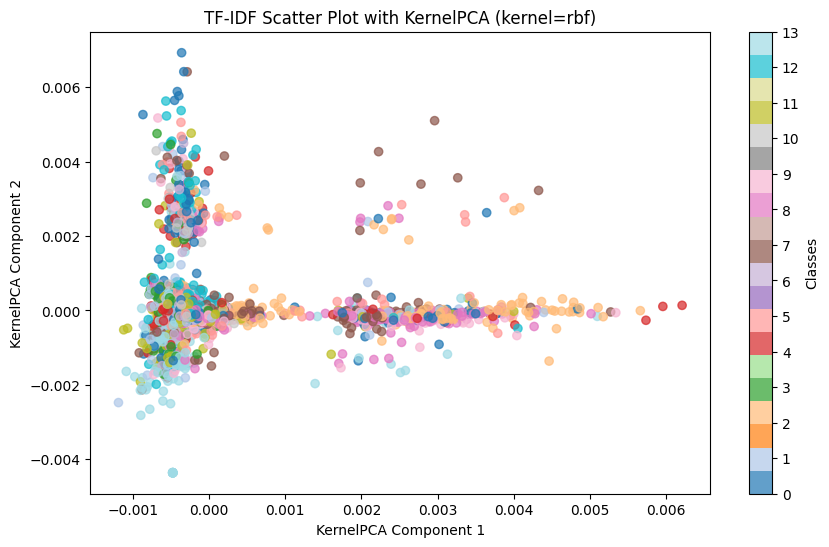

In [99]:
plot_tfidf_scatter_kpca(tfidf_train_title, y_train_encoded)
plot_tfidf_scatter_kpca(tfidf_train_title_spacy, y_train_encoded)


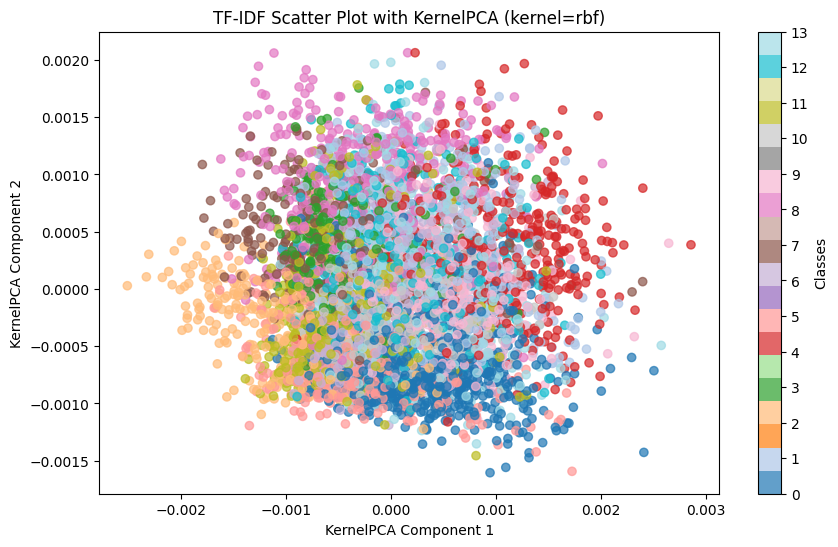

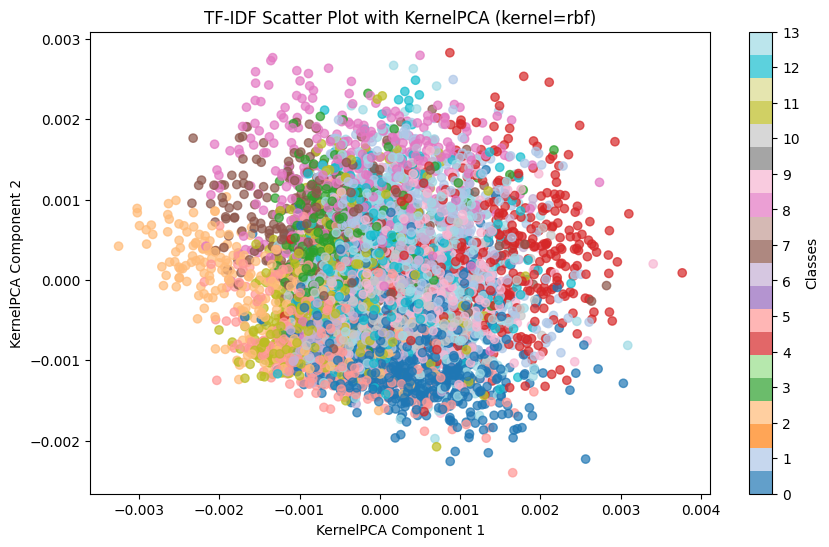

In [117]:
plot_tfidf_scatter_kpca(tfidf_train_body, y_train_encoded)
plot_tfidf_scatter_kpca(tfidf_train_body_spacy, y_train_encoded)


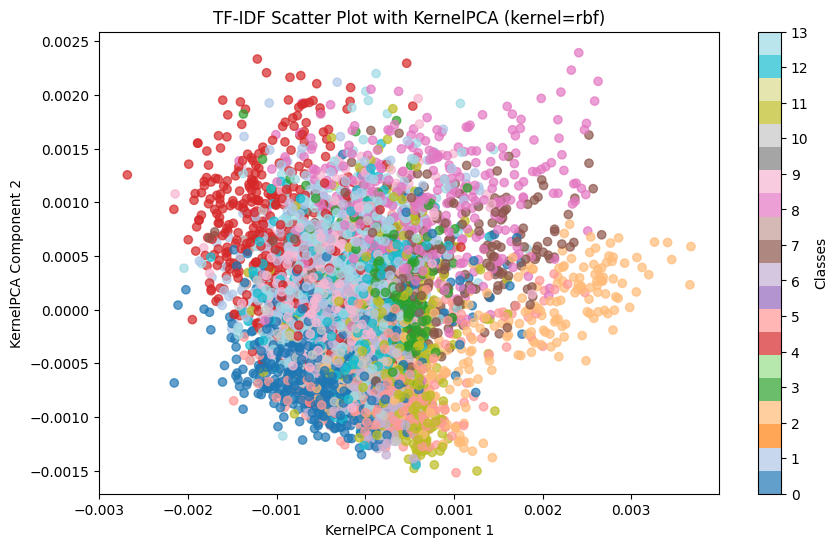

In [121]:
plot_tfidf_scatter_kpca(tfidf_train_combined, y_train_encoded)


In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def run_grid_search_for_classifiers(X_train_text, y_train):
    param_grid = {
        'tfidf__max_df': [0.05,0.1,0.2,0.3,0.4],
        'tfidf__min_df': [1, 2, 3, 4, 5,10,50],
        'tfidf__binary': [True, False] 

    }

    models = [
        ("SGDClassifier", SGDClassifier(random_state=42)),
        ("RidgeClassifier", RidgeClassifier(random_state=42)),
        ("KNeighborsClassifier", KNeighborsClassifier())

    ]

    results = {}

    for model_name, model in models:
        print(f"Running GridSearch for {model_name}...")
        
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(sublinear_tf=True)),
            ('clf', model)  
        ])
        
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)
        
        grid_search.fit(X_train_text, y_train)  
        
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation accuracy for {model_name}: {best_score}")
        print("-" * 60)
        
        results[model_name] = {
            'best_params': best_params,
            'best_score': best_score
        }
    
    return results


In [200]:
results = run_grid_search_for_classifiers(X_train_title, y_train)


Running GridSearch for SGDClassifier...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for SGDClassifier: {'tfidf__binary': True, 'tfidf__max_df': 0.1, 'tfidf__min_df': 1}
Best cross-validation accuracy for SGDClassifier: 0.6212386582463694
------------------------------------------------------------
Running GridSearch for RidgeClassifier...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for RidgeClassifier: {'tfidf__binary': True, 'tfidf__max_df': 0.1, 'tfidf__min_df': 1}
Best cross-validation accuracy for RidgeClassifier: 0.6366462886502577
------------------------------------------------------------
Running GridSearch for KNeighborsClassifier...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for KNeighborsClassifier: {'tfidf__binary': False, 'tfidf__max_df': 0.05, 'tfidf__min_df': 10}
Best cross-validation accuracy for KNeighborsClassifier: 0.3461086958349801
--------------------------------

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier, LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def run_grid_search_for_classifiers2(X_train_text, y_train):
    param_grid = {
        'tfidf__max_df': [0.1,0.4,0.6,0.7,0.9],
        'tfidf__min_df': [1, 2, 3, 4, 5,10,50],
        'tfidf__binary': [True, False] 

    }

    models = [
        ("SGDClassifier", SGDClassifier(random_state=42)),
        ("RidgeClassifier", RidgeClassifier(random_state=42)),
        ("KNeighborsClassifier", KNeighborsClassifier())

    ]

    results = {}

    for model_name, model in models:
        print(f"Running GridSearch for {model_name}...")
        
        pipeline = Pipeline([
            ('tfidf', TfidfVectorizer(sublinear_tf=True)),
            ('clf', model) 
        ])
        
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=3)
        
        grid_search.fit(X_train_text, y_train)  
        
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best cross-validation accuracy for {model_name}: {best_score}")
        print("-" * 60)
        
        results[model_name] = {
            'best_params': best_params,
            'best_score': best_score
        }
    
    return results


In [203]:
results2 = run_grid_search_for_classifiers2(X_train_body, y_train)


Running GridSearch for SGDClassifier...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for SGDClassifier: {'tfidf__binary': False, 'tfidf__max_df': 0.6, 'tfidf__min_df': 1}
Best cross-validation accuracy for SGDClassifier: 0.8145613400718137
------------------------------------------------------------
Running GridSearch for RidgeClassifier...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for RidgeClassifier: {'tfidf__binary': False, 'tfidf__max_df': 0.6, 'tfidf__min_df': 2}
Best cross-validation accuracy for RidgeClassifier: 0.8151101169703747
------------------------------------------------------------
Running GridSearch for KNeighborsClassifier...
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters for KNeighborsClassifier: {'tfidf__binary': False, 'tfidf__max_df': 0.6, 'tfidf__min_df': 10}
Best cross-validation accuracy for KNeighborsClassifier: 0.7358760164481707
-------------------------------

In [24]:
tfidf_vectorizer_title = TfidfVectorizer(sublinear_tf=True, max_df=0.1, min_df=1, ngram_range=(1, 1))


In [25]:
tfidf_vectorizer_body = TfidfVectorizer(sublinear_tf=True, max_df=0.6, min_df=2, ngram_range=(1, 1))


In [26]:
tfidf_train_title = tfidf_vectorizer_title.fit_transform(X_train_title)

tfidf_test_title= tfidf_vectorizer_title.transform(X_test_title)


In [27]:
tfidf_train_body = tfidf_vectorizer_body.fit_transform(X_train_body)

tfidf_test_body= tfidf_vectorizer_body.transform(X_test_body)


In [120]:
from scipy.sparse import hstack

tfidf_train_combined = hstack([tfidf_train_body, tfidf_train_title])

tfidf_test_combined = hstack([tfidf_test_body, tfidf_test_title])


In [28]:
from sklearn.linear_model import RidgeClassifier
from scipy.sparse import hstack
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def weighted_tfidf_optimization_with_cv(tfidf_train_title, tfidf_train_body, tfidf_test_title, tfidf_test_body, y_train, y_test, cv=5):
    ridge = RidgeClassifier()

    param_grid = {
        'title_weight': [1.0], 
        'body_weight': [1.0, 1.25,1.5,1.6,1.7,1.75,1.8,2.0]  
    }

    best_cv_accuracy = 0
    best_test_accuracy = 0
    best_params = {}

    for title_weight in param_grid['title_weight']:
        for body_weight in param_grid['body_weight']:
            X_train_combined = hstack([tfidf_train_title * title_weight, tfidf_train_body * body_weight])
            X_test_combined = hstack([tfidf_test_title * title_weight, tfidf_test_body * body_weight])
            
            cv_scores = cross_val_score(ridge, X_train_combined, y_train, cv=cv, scoring='accuracy')
            mean_cv_score = np.mean(cv_scores)
            
            ridge.fit(X_train_combined, y_train)
            y_pred = ridge.predict(X_test_combined)
            test_accuracy = accuracy_score(y_test, y_pred)
            
            print(f"Title weight: {title_weight}, Body weight: {body_weight}")
            print(f"Cross-Validation Accuracy Scores: {cv_scores}")
            print(f"Mean CV Accuracy: {mean_cv_score}")
            print(f"Test Accuracy: {test_accuracy}")
            print("-" * 60)
            
            if mean_cv_score > best_cv_accuracy or (mean_cv_score == best_cv_accuracy and test_accuracy > best_test_accuracy):
                best_cv_accuracy = mean_cv_score
                best_test_accuracy = test_accuracy
                best_params = {'title_weight': title_weight, 'body_weight': body_weight}

    X_train_combined_best = hstack([tfidf_train_title * best_params['title_weight'], tfidf_train_body * best_params['body_weight']])
    X_test_combined_best = hstack([tfidf_test_title * best_params['title_weight'], tfidf_test_body * best_params['body_weight']])
    
    ridge.fit(X_train_combined_best, y_train)
    y_pred = ridge.predict(X_test_combined_best)

    final_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Best Cross Val Accuracy: ", best_cv_accuracy)
    print("Best Test Accyracy: ", best_test_accuracy)
    print("Best Parameters: ", best_params)
    print(f"Final Test Accuracy: {final_accuracy}")
    print("Final Classification Report:\n", report)
    print("Final Confusion Matrix:\n", conf_matrix)

    return best_params

best_params = weighted_tfidf_optimization_with_cv(tfidf_train_title, tfidf_train_body, tfidf_test_title, tfidf_test_body, y_train, y_test)


Title weight: 1.0, Body weight: 1.0
Cross-Validation Accuracy Scores: [0.82768103 0.80843263 0.83211009 0.81284404 0.80825688]
Mean CV Accuracy: 0.8178649332739092
Test Accuracy: 0.8393250183418929
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.25
Cross-Validation Accuracy Scores: [0.83134739 0.80934922 0.83302752 0.8146789  0.81009174]
Mean CV Accuracy: 0.8196989547507126
Test Accuracy: 0.8341892883345561
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.5
Cross-Validation Accuracy Scores: [0.83501375 0.81301558 0.83486239 0.81100917 0.80917431]
Mean CV Accuracy: 0.8206150404897452
Test Accuracy: 0.8363903154805576
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.6
Cross-Validation Accuracy Scores: [0.83226398 0.81301558 0.83394495 0.81100917 0.80733945]
Mean CV Accuracy: 0.8195146276036631
Test Accuracy: 0.8378576669112252
------------------------

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack
import numpy as np

def weighted_tfidf_optimization_with_cv(model, tfidf_train_title, tfidf_train_body, tfidf_test_title, tfidf_test_body, y_train, y_test, cv=5):
    param_grid = {
        'title_weight': [1.0],  
        'body_weight': [1.0, 1.25, 1.35,1.40,1.45,1.5, 1.55, 1.6, 1.75, 1.8, 2.0]  
    }

    best_cv_accuracy = 0
    best_test_accuracy = 0
    best_params = {}

    for title_weight in param_grid['title_weight']:
        for body_weight in param_grid['body_weight']:
            X_train_combined = hstack([tfidf_train_title * title_weight, tfidf_train_body * body_weight])
            X_test_combined = hstack([tfidf_test_title * title_weight, tfidf_test_body * body_weight])
            
            cv_scores = cross_val_score(model, X_train_combined, y_train, cv=cv, scoring='accuracy')
            mean_cv_score = np.mean(cv_scores)
            
            model.fit(X_train_combined, y_train)
            y_pred = model.predict(X_test_combined)
            test_accuracy = accuracy_score(y_test, y_pred)
            
            print(f"Title weight: {title_weight}, Body weight: {body_weight}")
            print(f"Cross-Validation Accuracy Scores: {cv_scores}")
            print(f"Mean CV Accuracy: {mean_cv_score}")
            print(f"Test Accuracy: {test_accuracy}")
            print("-" * 60)
            
            if mean_cv_score > best_cv_accuracy or (mean_cv_score == best_cv_accuracy and test_accuracy > best_test_accuracy):
                best_cv_accuracy = mean_cv_score
                best_test_accuracy = test_accuracy
                best_params = {'title_weight': title_weight, 'body_weight': body_weight}

    X_train_combined_best = hstack([tfidf_train_title * best_params['title_weight'], tfidf_train_body * best_params['body_weight']])
    X_test_combined_best = hstack([tfidf_test_title * best_params['title_weight'], tfidf_test_body * best_params['body_weight']])
    
    model.fit(X_train_combined_best, y_train)
    y_pred = model.predict(X_test_combined_best)

    final_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Best Cross Val Accuracy: ", best_cv_accuracy)
    print("Best Test Accyracy: ", best_test_accuracy)
    print("Best Parameters: ", best_params)
    print(f"Final Test Accuracy: {final_accuracy}")
    print("Final Classification Report:\n", report)
    print("Final Confusion Matrix:\n", conf_matrix)

    return best_params



In [38]:
sgd = SGDClassifier(random_state=42)
best_params1 = weighted_tfidf_optimization_with_cv(sgd, tfidf_train_title, tfidf_train_body, tfidf_test_title, tfidf_test_body, y_train, y_test)


Title weight: 1.0, Body weight: 1.0
Cross-Validation Accuracy Scores: [0.82676444 0.80384968 0.82385321 0.80550459 0.80825688]
Mean CV Accuracy: 0.8136457588778917
Test Accuracy: 0.8297872340425532
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.25
Cross-Validation Accuracy Scores: [0.82309808 0.80751604 0.84036697 0.81009174 0.81192661]
Mean CV Accuracy: 0.8185998873182587
Test Accuracy: 0.83492296404989
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.35
Cross-Validation Accuracy Scores: [0.8304308  0.81484876 0.84036697 0.81192661 0.81376147]
Mean CV Accuracy: 0.8222669211816447
Test Accuracy: 0.8371239911958914
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.4
Cross-Validation Accuracy Scores: [0.82768103 0.81026581 0.83486239 0.81284404 0.81100917]
Mean CV Accuracy: 0.819332486818759
Test Accuracy: 0.8378576669112252
--------------------------

In [39]:
ridge = RidgeClassifier(random_state=42)
best_params1 = weighted_tfidf_optimization_with_cv(ridge, tfidf_train_title, tfidf_train_body, tfidf_test_title, tfidf_test_body, y_train, y_test)


Title weight: 1.0, Body weight: 1.0
Cross-Validation Accuracy Scores: [0.82768103 0.80843263 0.83211009 0.81284404 0.80825688]
Mean CV Accuracy: 0.8178649332739092
Test Accuracy: 0.8393250183418929
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.25
Cross-Validation Accuracy Scores: [0.83134739 0.80934922 0.83302752 0.8146789  0.81009174]
Mean CV Accuracy: 0.8196989547507126
Test Accuracy: 0.8341892883345561
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.35
Cross-Validation Accuracy Scores: [0.83226398 0.81209899 0.83486239 0.81376147 0.80917431]
Mean CV Accuracy: 0.8204322269780271
Test Accuracy: 0.8356566397652238
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.4
Cross-Validation Accuracy Scores: [0.83134739 0.81301558 0.83577982 0.81192661 0.81009174]
Mean CV Accuracy: 0.8204322269780271
Test Accuracy: 0.8378576669112252
-----------------------

In [211]:
logi = LogisticRegression(max_iter=1000, random_state=42)
best_params1 = weighted_tfidf_optimization_with_cv(logi, tfidf_train_title, tfidf_train_body, tfidf_test_title, tfidf_test_body, y_train, y_test)


Title weight: 1.0, Body weight: 1.0
Cross-Validation Accuracy Scores: [0.81301558 0.79193401 0.80458716 0.79724771 0.77889908]
Mean CV Accuracy: 0.7971367064977002
Test Accuracy: 0.8275862068965517
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.25
Cross-Validation Accuracy Scores: [0.82309808 0.79468378 0.81376147 0.81009174 0.79082569]
Mean CV Accuracy: 0.8064921501189884
Test Accuracy: 0.8327219369038885
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.5
Cross-Validation Accuracy Scores: [0.82768103 0.8020165  0.82293578 0.8146789  0.79541284]
Mean CV Accuracy: 0.8125450096284025
Test Accuracy: 0.8400586940572267
------------------------------------------------------------
Title weight: 1.0, Body weight: 1.6
Cross-Validation Accuracy Scores: [0.83318057 0.8020165  0.82110092 0.81376147 0.79357798]
Mean CV Accuracy: 0.8127274867767135
Test Accuracy: 0.8422597212032281
------------------------

In [40]:
X_train_combined = hstack([tfidf_train_title, tfidf_train_body * 1.35])
X_test_combined = hstack([tfidf_test_title, tfidf_test_body * 1.35])


In [41]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def sgd_hyperparameter_optimization(X_train_combined, X_test_combined, y_train, y_test):
    sgd = SGDClassifier(random_state=42)

    param_grid = {
        'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'max_iter': [1000, 2000, 3000],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
    }

    grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
    
    grid_search.fit(X_train_combined, y_train)

    print("Best Accuracy: ", grid_search.best_score_)
    print("Best Parameters: ", grid_search.best_params_)

    best_sgd = grid_search.best_estimator_
    y_pred = best_sgd.predict(X_test_combined)

    test_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Final Test Accuracy: {test_accuracy}")
    print("Final Classification Report:\n", report)
    print("Final Confusion Matrix:\n", conf_matrix)

    return grid_search.best_params_, test_accuracy

best_params, test_accuracy = sgd_hyperparameter_optimization(X_train_combined, X_test_combined, y_train, y_test)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2880 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bahar\.ai-navigator\conda\Lib\site-packages\sklearn\linear_model\_

En iyi doğruluk:  0.8226328845684879
En iyi parametreler:  {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l2'}
Final Test Accuracy: 0.842993396918562
Final Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.89      0.89      0.89       208
      BUSINESS       0.81      0.72      0.76       109
        COMEDY       0.82      0.85      0.83        74
         CRIME       0.80      0.92      0.86        53
     EDUCATION       0.86      0.92      0.89       110
 ENTERTAINMENT       0.84      0.76      0.80        93
   ENVIRONMENT       0.87      0.80      0.83        99
         MEDIA       0.78      0.86      0.82        58
      POLITICS       0.85      0.86      0.85        95
      RELIGION       0.83      0.88      0.85        97
       SCIENCE       0.80      0.87      0.83        68
        SPORTS       0.88      0.94      0.91       103
          TECH       0.85      0.83  

In [42]:
X_train_combined = hstack([tfidf_train_title, tfidf_train_body * 1.45])
X_test_combined = hstack([tfidf_test_title, tfidf_test_body * 1.45])


In [43]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def ridge_hyperparameter_optimization(X_train_combined, X_test_combined, y_train, y_test):
    ridge = RidgeClassifier(random_state=42)

    param_grid = {
        'alpha': [0.001,.01,0.05,0.1, 1.0, 2,3,5],
        'tol': [1e-4, 1e-3, 1e-2,0.1,0.5] 
    }

    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
    
    grid_search.fit(X_train_combined, y_train)

    print("Best Accuracy: ", grid_search.best_score_)
    print("Best Parameters: ", grid_search.best_params_)

    best_ridge = grid_search.best_estimator_
    y_pred = best_ridge.predict(X_test_combined)

    test_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Final Test Accuracy: {test_accuracy}")
    print("Final Classification Report:\n", report)
    print("Final Confusion Matrix:\n", conf_matrix)

    return grid_search.best_params_, test_accuracy

best_params, test_accuracy = ridge_hyperparameter_optimization(X_train_combined, X_test_combined, y_train, y_test)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi doğruluk:  0.8226342300221159
En iyi parametreler:  {'alpha': 2, 'tol': 0.01}
Final Test Accuracy: 0.842993396918562
Final Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.89      0.89      0.89       208
      BUSINESS       0.84      0.72      0.78       109
        COMEDY       0.83      0.85      0.84        74
         CRIME       0.80      0.91      0.85        53
     EDUCATION       0.87      0.91      0.89       110
 ENTERTAINMENT       0.78      0.74      0.76        93
   ENVIRONMENT       0.88      0.84      0.86        99
         MEDIA       0.81      0.86      0.83        58
      POLITICS       0.85      0.85      0.85        95
      RELIGION       0.83      0.88      0.85        97
       SCIENCE       0.81      0.87      0.84        68
        SPORTS       0.87      0.94      0.91       103
          TECH       0.80      0.83      0.81        86

In [44]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def ridge_hyperparameter_optimization(X_train_combined, X_test_combined, y_train, y_test):
    ridge = RidgeClassifier(random_state=42)

    param_grid = {
        'alpha': [0.001,.01,0.05,0.1, 1.0, 2,3,5],
        'tol': [1e-4, 1e-3, 1e-2,0.1,0.5] 
    }

    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
    
    grid_search.fit(tfidf_train_body, y_train)

    print("Best Accuracy: ", grid_search.best_score_)
    print("Best Parameters: ", grid_search.best_params_)

    best_ridge = grid_search.best_estimator_
    y_pred = best_ridge.predict(tfidf_test_body)

    test_accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Final Test Accuracy: {test_accuracy}")
    print("Final Classification Report:\n", report)
    print("Final Confusion Matrix:\n", conf_matrix)

    return grid_search.best_params_, test_accuracy

best_params, test_accuracy = ridge_hyperparameter_optimization(X_train_combined, X_test_combined, y_train, y_test)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
En iyi doğruluk:  0.8167613249354602
En iyi parametreler:  {'alpha': 1.0, 'tol': 0.1}
Final Test Accuracy: 0.8312545854732208
Final Classification Report:
                 precision    recall  f1-score   support

ARTS & CULTURE       0.88      0.91      0.89       208
      BUSINESS       0.80      0.70      0.75       109
        COMEDY       0.82      0.86      0.84        74
         CRIME       0.78      0.85      0.81        53
     EDUCATION       0.89      0.88      0.89       110
 ENTERTAINMENT       0.83      0.69      0.75        93
   ENVIRONMENT       0.82      0.86      0.84        99
         MEDIA       0.81      0.83      0.82        58
      POLITICS       0.81      0.85      0.83        95
      RELIGION       0.81      0.89      0.85        97
       SCIENCE       0.80      0.82      0.81        68
        SPORTS       0.87      0.94      0.90       103
          TECH       0.80      0.81      0.81        

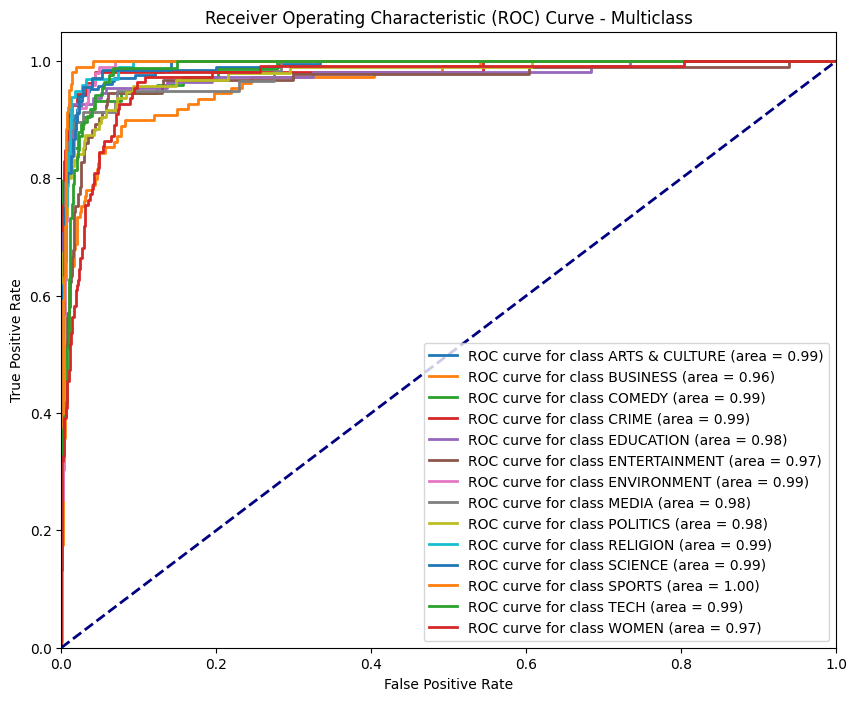

<Figure size 640x480 with 0 Axes>

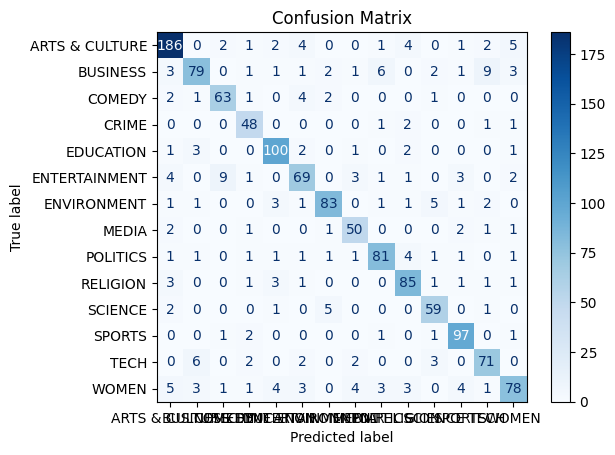

Çapraz doğrulama doğruluk skorları: [0.82951421 0.81393217 0.83577982 0.82110092 0.81284404]
Ortalama çapraz doğrulama doğruluk skoru: 0.8226


In [87]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

ridge_model = RidgeClassifier(alpha=2, tol=0.01, random_state=42)
ridge_model.fit(X_train_combined, y_train)

plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    y_test_proba = ridge_model.decision_function(X_test_combined)[:, i]
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')

plt.figure()
ConfusionMatrixDisplay.from_estimator(ridge_model, X_test_combined, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

cross_val_scores = cross_val_score(ridge_model, X_train_combined, y_train, cv=5)
print(f"Cross validation accuracy scores: {cross_val_scores}")
print(f"Mean cross val accuracy score: {cross_val_scores.mean():.4f}")


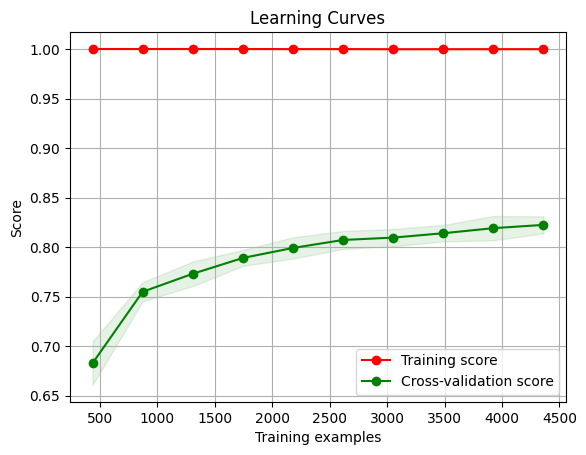

In [88]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    ridge_model, X_train_combined, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.grid()
plt.show()
